In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw12.ipynb")

<img src="data8logo.png" alt="Data 8 Logo" style="width: 15%; float: right; padding: 1%; margin-right: 2%;"/>

# Homework 12: MLR

**Helpful Resource:**

- [Python Reference](http://data8.org/sp25/reference/): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Reading**: 

* [Classification](https://www.inferentialthinking.com/chapters/17/Classification.html)
* [Multiple Regression](https://inferentialthinking.com/chapters/17/6/Multiple_Regression.html)

**Credits**:

* **Conan Smallwood** + Fall 2024 Pedagogy Team
* **Dagny Streit** + Spring 2025 Pedagogy Team
* **Ella DeGuzman & Brandon Su** + Spring 2025 Content Team

Please complete this notebook by filling in the cells provided. **Before you begin, execute the cell below to setup the notebook by importing some helpful libraries.** Each time you start your server, you will need to execute this cell again.

For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, **please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!

**Deadline:**

This assignment is **due Sunday, 5/4 at 5:00pm PT**. Submissions after this time will be accepted for 24 hours and will incur a 20% penalty. Any submissions later than this 24 hour period will not be accepted unless an extension has been granted as per the [policies](http://data8.org/sp25/policies/) page. Turn it in by Saturday, 5/3 at 5:00pm PT for 5 extra credit points.

<span style="color:red">**Note: This homework has hidden tests on it. That means even though tests may say 100% passed, it doesn't mean your final grade will be 100%. We will be running more tests for correctness once everyone turns in the homework.**</span>

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the [policies](http://data8.org/sp25/policies/#learning-cooperatively) page to learn more about how to learn cooperatively.

You should start early so that you have time to get help if you're stuck. Office hours are held Monday through Friday in [Warren Hall](https://www.berkeley.edu/map?warren) 101B. The office hours schedule appears [here](http://data8.org/sp25/schedule/).

---

The point breakdown for this assignment is given in the table below:
| Category | Points |
| --- | --- |
| Autograder (Coding questions) | 87 |
| Written | 13 |
| **Total** | 100 |

In [2]:
# Run this cell to set up the notebook, but please don't change it.

import numpy as np
from datascience import * 
import hashlib

# These lines do some fancy plotting magic.
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 1. Exploration of CO2 Emissions Dataset

In the following exploration, we will be working with a dataset containing 7385 cars, their specifications, and their CO2 emissions (g/km). 

Run the following cell to load information about `co2_raw` and preview the first few rows.

In [3]:
co2_raw = Table().read_table("CO2 Emissions.csv").drop(2,5,6,9,10)
co2_raw.show(5)

Make,Model,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),CO2 Emissions(g/km)
ACURA,ILX,2,4,9.9,6.7,196
ACURA,ILX,2.4,4,11.2,7.7,221
ACURA,ILX HYBRID,1.5,4,6,5.8,136
ACURA,MDX 4WD,3.5,6,12.7,9.1,255
ACURA,RDX AWD,3.5,6,12.1,8.7,244


For the sake of our exploration, let's rename some of the columns and call this new table `co2`.

In [4]:
co2 = co2_raw.relabeled(
    "Engine Size(L)", "Engine").relabeled(
    "Fuel Consumption City (L/100 km)", "Fuel (City)").relabeled(
    "Fuel Consumption Hwy (L/100 km)", "Fuel (Hwy)").relabeled(
    "CO2 Emissions(g/km)", "Emissions")
co2.show(5)

Make,Model,Engine,Cylinders,Fuel (City),Fuel (Hwy),Emissions
ACURA,ILX,2,4,9.9,6.7,196
ACURA,ILX,2.4,4,11.2,7.7,221
ACURA,ILX HYBRID,1.5,4,6,5.8,136
ACURA,MDX 4WD,3.5,6,12.7,9.1,255
ACURA,RDX AWD,3.5,6,12.1,8.7,244


We aim to predict the average CO2 emissions in grams per kilometer of an unseen car based on its __Engine__, __Cylinders__, __Fuel (City)__, and __Fuel (Hwy)__. To do this, we must first standardize and explore the data!

---

__Question 1.1__ Define a function `standardize` that takes in a column name `col` in a table `tbl`, and returns that column as an array in standard units. __(3 Points)__

In [5]:
def standardize(tbl, col):
    arr = tbl.column(col)
    su = (arr - np.mean(arr)) / np.std(arr) 
    return su 

In [6]:
grader.check("q1_1")

q1_1 results: All test cases passed!

---

__Question 1.2__ Define a function `correlation` that takes in the names of two columns (`x` and `y`) in a table `tbl`, and returns the correlation coefficient `r` between the two columns. __(3 Points)__

In [7]:
def correlation(tbl, x, y):
    # return np.mean(tbl.column(x) * tbl.column(y)) # returns 859.29689911983746
    return np.mean(standardize(tbl, x) * standardize(tbl, y)) # we want in su 

correlation(co2, "Engine", "Emissions")

0.8511446437900011

In [8]:
grader.check("q1_2")

q1_2 results: All test cases passed!

---

__Question 1.3__ Using the function you previously defined, calculate the correlation coefficient between `Emissions` and all other _numerical_ columns in the `co2` table. __(3 Points)__

Note: For the sake of passing the public tests, make sure `numerical_column_names` is an array of **strings**.

In [9]:
numerical_column_names = make_array("Engine", "Cylinders", "Fuel (City)", "Fuel (Hwy)")

for col_name in numerical_column_names:
    current_r = correlation(co2, col_name, "Emissions")
    print(f"{col_name}: {current_r}")

Engine: 0.8511446437900011
Cylinders: 0.8326436002237774
Fuel (City): 0.9195924749024844
Fuel (Hwy): 0.8835359454649433


In [10]:
grader.check("q1_3")

q1_3 results: All test cases passed!

---

__Question 1.4__ Which numerical column is most strongly correlated with __Emissions__? Assign `highest_correlation` to the integer corresponding to the correct column. __(3 Points)__

1. Engine
2. Cylinders
3. Fuel (City)
4. Fuel (Hwy)

In [11]:
highest_correlation = 3

In [12]:
grader.check("q1_4")

q1_4 results: All test cases passed!

<!-- BEGIN QUESTION -->

---

__Question 1.5__ Now, let's visualize the relationship between __Fuel (City)__ and __Emissions__. In the cell below, produce a scatter plot that plots the __Fuel (City)__ and __Emissions__ of every entry in the `co2` table with __Emissions__ on the y-axis. __(3 Points)__

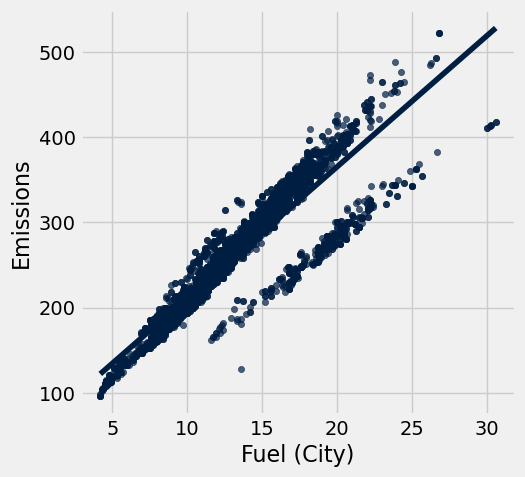

In [13]:
co2.scatter("Fuel (City)", "Emissions", fit_line=True)

<!-- END QUESTION -->

Woah! It looks like the points are very tightly clustered around one line... or, two lines? What could be the cause of this? Let's take another look at our table and see which column could possibly explain what we see in the scatter plot.

---

__Question 1.6__ Assign `unique_cylinders_values` to a two-column table: the first column should contain unique value in `Cylinders`; the second column should contain the number of times that each of these unique values appear in the `co2` table. __(3 Points)__

$\text{Unique values}\Rightarrow\text{tbl.group}$

In [14]:
unique_cylinders_values = co2.group("Cylinders")
unique_cylinders_values

Cylinders,count
3,95
4,3220
5,26
6,2446
8,1402
10,42
12,151
16,3


In [15]:
grader.check("q1_6")

q1_6 results: All test cases passed!

It seems that most of the cars in the table fall under one of few __Cylinders__ values. Could this explain the split we see in the scatter plot? 

---

__Question 1.7__ Create a table called `co2_new` by adding a new column `Cylinders_and_City` to the `co2` table that is the sum of the columns `Fuel (City)` and `Cylinders`. Then, find the correlation between this new column and `Emissions`. __(3 Points)__

In [16]:
co2_new = co2.with_columns("Cylinders_and_City", co2.column("Fuel (City)") + co2.column("Cylinders")) # didnt like sum function because sum(iterable, start=0)
# i.e. + adds each element wise in the array 
strong_correlation = correlation(co2_new, "Cylinders_and_City", "Emissions")
strong_correlation

0.93263817235145607

In [17]:
grader.check("q1_7")

q1_7 results: All test cases passed!

---

__Question 1.8__ True or False: The correlation coefficient between __Emissions__ and the sum of the __Cylinders__ and __Fuel (City)__ columns is _greater_ than the correlation coefficient between __Emissions__ and just the __Fuel (City)__ column. Assign `answer` to either `True` or `False`. __(3 Points)__

In [18]:
answer = True # bool(1) :-) #  City 0.9195924749024844 < Sum 0.93263817235145607

In [19]:
grader.check("q1_8")

q1_8 results: All test cases passed!

Now, let's visualize this new column on a scatter plot.

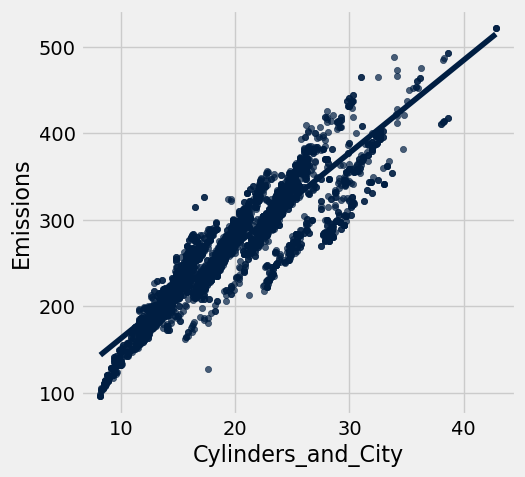

In [20]:
co2_new.scatter("Cylinders_and_City", "Emissions", fit_line=True)

This looks more like a scatter plot that we're used to seeing! **A lot of the time, there is more than one variable that contributes to the variable we are trying to predict.** Sure, we can just use fuel consumption in the city to predict a car's emission levels, but there are other variables that we aren't accounting for! Including _multiple_ variables in our regression increases our model's ability to capture more complex patterns, and account for multiple factors that may be affecting the variable we want to predict!

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 2. Multiple Linear Regression to Predict CO2 Emissions


<div style="font-family: 'Times New Roman'; font-size: 18px;">
    
**Notes:**
1. In multiple linear regression, a numerical output is predicted from numerical input attributes by multiplying each attribute value by a different slope, then summing the results.
2. Before we begin prediction, we split our data randomly into a training and test set of equal size.
3. The slopes in multiple regression is an array that has one slope value for each attribute in an example.
   - Predicting the x involves multiplying each attribute by the slope and summing the result
   - Since the example_slopes above were chosen at random, we should not expect them to provide accurate predictions at all. (i.e. when comparing
4. **next** step in performing multiple regression is to define the least squares objective
   - perform the prediction for each row in the training set
   - then compute the **RMSE** of the predictions from the actual x you test from.
5. Lastly, use `minimize` function to find the slopes with the **lowest RMSE**. Since the function we want to minimize, rmse_train, takes an array instead of a number, we must pass the `array=True` argument to `minimize`
   - speed up process with `smooth=True` attribute
6. A residual plot for multiple regression typically compares the errors (residuals) to the actual values of the predicted variable.
   - As with simple linear regression, interpreting the result of a predictor is at least as important as making predictions.
7. Another approach to predicting x is to use a variable of similar x. This **nearest neighbor for regression** approach is very similar to our classifier.
   - One simple method for predicting the x is to average the x's of the nearest neighbors $\rightarrow$ then compare preediction with observed x for our one test example
8. For some data, the errors of the two techniques could be similar.
   - For different data sets, one technique might outperform another.
    - By computing the RMSE of both techniques on the same data, we can compare methods fairly.
    - One note of caution: the difference in performance might not be due to the technique at all:
        - it might be due to the random variation due to sampling the training and test sets in the first place.
    - Finally, we can draw a residual plot for these predictions using `with_columns` and `plot`
</div>

Before beginning this section of the homework, please read [this section of the textbook](https://inferentialthinking.com/chapters/17/6/Multiple_Regression.html) on Multiple Linear Regression!

What we've done so far in this class is called Simple Linear Regression (SLR), which involves one attribute to estimate a single numerical outcome. Precisely, the equation for the regression line has the following form: $$y = \text{slope} \cdot x+\text{intercept}$$ Here, $x$ is the attribute, and we predict the value of $y$ by applying a slope and adding an intercept.

Now, we will extend this idea to Multiple Linear Regression (MLR), which uses multiple attributes instead of just one. We make the prediction by multiplying each attribute value by its corresponding slope and summing them all together. The equation for the regression line has the following form: $$y = \text{slope}_1 \cdot x_1 + \text{slope}_2 \cdot x_2+ ... +\text{slope}_k \cdot x_k$$ for $k$ predictor variables. Here, $x_1$, $x_2$, $\cdots$, $x_k$ represent different numerical predictor variables from the dataset, and we still predict a single numerical output $y$. Each predictor variable gets its own slope. Note that in this homework, our equation for the regression line will not have an intercept, but in general, the equation for the regression line can have an intercept!

We use MLR when we believe more than one attribute influences the outcome we are trying to predict. To build the model, we split the dataset into a training set and a testing set. We use the training set to find the best slopes, and then evaluate its performance using Root Mean Squared Error (RMSE) on the testing set.

In this part of the homework, we will use MLR to predict the CO2 emissions of a car using its engine size, cylinders, city fuel consumption, and highway fuel consumption.

---

__Question 2.1__ In order to accurately assess how well a model can generalize and predict unseen data, it is important to first divide your dataset into a training set and a test set. Fill in the following code to first select the columns for engine size, cylinders, city fuel consumption, highway fuel consumption, and emissions. Then, to shuffle the data, reserve the first $1000$ data points for the test set, and assign the rest to the training set. __(6 Points)__

Note: Do __not__ use `tbl.split` (you will not pass the autograder). Take a look at [Section 17.2.2](https://inferentialthinking.com/chapters/17/2/Training_and_Testing.html#generating-a-test-set) on how to get your training and test sets.

Hint: `numerical_co2` should be a table of only the numerical columns from `co2`.

**Chapter 17, 2.2**

```python
shuffled_ckd = ckd.sample(with_replacement=False)
training = shuffled_ckd.take(np.arange(79))
testing = shuffled_ckd.take(np.arange(79, 158))
```

In [21]:
np.random.seed(8) #DO NOT CHANGE

numerical_co2 = co2.select('Engine', 'Cylinders', 'Fuel (City)', 'Fuel (Hwy)', 'Emissions')
total_rows = numerical_co2.num_rows # 7385 # may change thats why its defined
shuffled_tbl = numerical_co2.sample(with_replacement=False)

test_set = shuffled_tbl.take(np.arange(1000))
training_set = shuffled_tbl.take(np.arange(1000, total_rows)) # use total_rows in case the func updates with new rows

In [22]:
grader.check("q2_1")

q2_1 results: All test cases passed!

Now the question is: How do we obtain the slopes ($\text{slope}_1, \text{slope}_2, ... \text{slope}_k$) that minimizes the RMSE (reminder that the RMSE helps quantify the average size of the error our prediction model makes on any given testing observation). Well, our end result is going to look something like `minimize(fit)` where `fit` is a function that takes in an array of slopes and returns the RMSE of our predictions. However, there is a lot that goes into this calculation; let's take this one step at a time.

---

__Question 2.2__ Define the function `predict` that takes in an array of slopes and a row object of attributes, and returns a number representing the corresponding prediction. You may assume that the array of slopes and the row object of attributes will be of the same length. __(3 Points)__

Hint 1: Take a look at [Section 17.6.2](https://inferentialthinking.com/chapters/17/6/Multiple_Regression.html#multiple-linear-regression)

Hint 2: You can perform array arithmetic on row objects as well!

In [23]:
def predict(slopes, attributes):
    return sum(slopes * np.array(attributes))

In [24]:
grader.check("q2_2")

q2_2 results: All test cases passed!

---

__Question 2.3__ Now that we've defined a function that returns a prediction given an array of slopes and a row object of attributes, let's define `rmse` which takes in an array of slopes, a _table_ of attributes that we would like to use in our prediction, and an array of the _true_ values of y we want to predict. The function should return the RMSE of our predictions. __(10 Points)__

Hint: Take a look at [Section 17.3](https://inferentialthinking.com/chapters/17/3/Rows_of_Tables.html) for a review on row objects

<div style="font-family: 'Times New Roman'; font-size: 18px;" >

**Row Object:** 
1. Rows have their very own data type: they are row objects.
2. Notice how the display shows not only the values in the row but also the labels of the corresponding columns.
3. Rows are not arrays, $\rightarrow$ we must convert with `np.array` when we have numerical data in a row
   - However, rows share some characteristics with arrays. You can use item to access a particular element of a row.
   - `tbl.row(0).item(3)` (valid)
   - Rows whose elements are all numerical (or all strings) can be converted to arrays. Converting a row to an array gives us access to arithmetic operations and numpy module imports
</div>


<details>
    <summary>Attempts at problem WWIW</summary>

```python
    def rmse(slopes, attributes, y):
    """ Idea
    1. rmse (arr) 
    2. tbl of attributes (rows) for predict() func
    3. array of true values of y we want to predict 
    4. return rmse of our predict func 
    """
    error = np.array()  # wrong 
    for i in np.arange(len(y)):
        attr_row = np.array(attributes) 
        pred = predicted(slopes, attr_row.row(i)) # technically right but could be more readable 
        actual = y.item(i)
        err = pred - actual 
        rmse = np.sqrt(np.mean(np.square(res)))
    return rmse # just returning and not appending to error array 
```
</details>


In [25]:
# def rmse(slopes, attributes, y):
#     ...
#     for ...:
#         ...
#     return ...

def rmse(slopes, attributes, y):
    """ Idea
    1. rmse (arr) 
    2. tbl of attributes (rows) for predict() func
    3. array of true values of y we want to predict 
    4. return rmse of our predict func 
    """
    error = make_array() 
    for i in np.arange(len(y)):
        attr_row = np.array(attributes.row(i))
        pred = predict(slopes, attr_row)
        actual = y.item(i)
        error = np.append(error, np.square(pred - actual))
    return np.sqrt(np.mean(error)) 

Let's test out the `rmse` function we just defined on our training set with some made up slope values that definitely are not optimal.

In [26]:
train_attributes = training_set.drop("Emissions")
train_emissions = training_set.column("Emissions")

fake_slopes = make_array(1,1,1,1)
rmse(fake_slopes, train_attributes, train_emissions)

225.80835062898427

In [27]:
grader.check("q2_3")

q2_3 results: All test cases passed!

Those are some pretty big errors! It's quite clear that the optimal array of slopes is not just a bunch of 1's. However, now that we've defined `rmse`, we are finally ready to define `train_fit`!

---

__Question 2.4__ Define `train_fit`, which takes in an array of slopes and returns the RMSE on the <u>training set</u>. __(5 Points)__

Hint: We're looking to predict emissions from our attributes!

In [28]:
def train_fit(slopes_array):
    """Idea: 
        1. take in slope arrays
        2. return RMSE on training set (use our prev defined rmse func)
    """
    return rmse(slopes_array, train_attributes, train_emissions)
    

In [29]:
grader.check("q2_4")

q2_4 results: All test cases passed!

---

__Question 2.5__ Obtain the array of slopes that minimize the RMSE on the training set, and assign that to `best_slopes`. __(4 Points)__

*Hint*: Make sure to use `fake_slopes` as one of your arguments. When the numerical optimization begins, the model might try out some inoptimal slopes first as it's searching for what will eventually be the right ones -- meaning, the ones that minimize RMSE!

Note: Take a look at [Section 17.6.2](https://inferentialthinking.com/chapters/17/6/Multiple_Regression.html#multiple-linear-regression)

<div style="font-family: 'Times New Roman'; font-size: 18px;">

<details>
<summary>Code on Miniziming</summary>
    
- Lastly, use `minimize` function to find the slopes with the lowest RMSE.
- Since the function we want to minimize, rmse_train, takes an array instead of a number, we must pass the array=True argument to minimize speed up process with `smooth=True` attribute

    ```python
    best_slopes = minimize(rmse_train, start=example_slopes, smooth=True, array=True)
    print('The best slopes for the training set:')
    Table(train_attributes.labels).with_row(list(best_slopes)).show()
    print('RMSE of all training examples using the best slopes:', rmse_train(best_slopes))
    ```
- **WIWW Note:** Minimize expects a function as its first argument. Something it can repeatedly call with different slope arrays during optimization. When I passed in an argument to the `train_fit` function, it returns a data-tyoe that is no longer callable. 
</details>

</div>

In [30]:
# This cell might take around one minute to run
best_slopes = minimize(train_fit, start=fake_slopes, smooth=True, array=True) # do not pass in an element into train_fit
# best_slopes returns array of optimizations 

In [31]:
grader.check("q2_5")

q2_5 results: All test cases passed!

Let's see how well our optimal model performs on the training set.

In [32]:
train_fit(best_slopes)

22.753604146635826

Not bad at all! 

Let's take a look at the values in `best_slopes`

In [33]:
best_slopes

array([ -5.43306185,  14.15067357,   5.22287989,  13.34996503])

That seems a bit weird... doesn't it? Let's look at `train_attributes` again, the table of attributes we use to predict an emissions value.

In [34]:
train_attributes.show(5)

Engine,Cylinders,Fuel (City),Fuel (Hwy)
3,6,12.2,8.5
3,6,19.4,14.8
5.7,8,14.7,9.4
2,4,10.4,7.5
1.6,4,8.9,6.9


You might have noticed something surprising: even though `Engine` and `Emissions` had a strong positive correlation (with an r value of around 0.85), the slope value for `Engine` obtained in MLR, which is denoted by the first element in the `best_slopes` array, is negative.

**This happens when the `Engine` attribute is correlated with other attributes in the model!**

---

__Question 2.6__ Now that we've obtained the array of slope values that minimize the RMSE, it's time to assess the performance of our model on the test set! Assign `test_rmse` to the RMSE obtained by using our regression line on the test set. __(3 Points)__

<div style="font-family: 'Times New Roman'; font-size: 18px;">

<details>

<summary>Code overview of step 7</summary>

- A residual plot for multiple regression typically compares the errors (residuals) to the actual values of the predicted variable.
    - As with simple linear regression, interpreting the result of a predictor is at least as important as making predictions.
- Another approach to predicting x is to use a variable of similar x. This nearest neighbor for regression approach is very similar to our classifier.
    - One simple method for predicting the x is to average the x's of the nearest neighbors  then compare preediction with observed x for our one test example

    ```python
    test_prices = test.column(0) 
    test_attributes = test.drop(0)
    
    def rmse_test(slopes):
        return rmse(slopes, test_attributes, test_prices)
    
    rmse_linear = rmse_test(best_slopes)
    print('Test set RMSE for multiple linear regression:', rmse_linear)
    
    ```
</details>

</div>

In [35]:
test_attributes = test_set.drop("Emissions") # drop emissions in table
test_emissions = test_set.column("Emissions")  # array we test agaisnt 

test_rmse = rmse(best_slopes, test_attributes, test_emissions)
test_rmse

22.751674695058089

In [36]:
grader.check("q2_6")

q2_6 results: All test cases passed!

<!-- BEGIN QUESTION -->

---

__Question 2.7__ Compare the values of the training RMSE and testing RMSE. What do the values suggest about our model's ability to perform well on unseen data? __(5 Points)__ 

*Hint*: If the testing RMSE was much larger than the training RMSE, what would this say about our model's ability to perform well on unseen data?

This model performs well on unseen data based on the training we did with Mutliple Linear Regression. See below: 
```
test rmse: 22.751674695058089
train_fit rmse: 22.753604146635826
train with fake slope: 225.80835062898427
```
When debugging the answer for 2.6, I accidently used `train_set` as the table for rmse which made me worry that now the model is trained on data with trained table and has the predictions, which is just fitting the training data. However, I believe that just resetting it to `test_set` will make it work with unseen data again, to allow us to come to the conclusion that our model generalizes well and is not overfitting because its performance on unseen data is similar to its performance on training data. 

<!-- END QUESTION -->

**Including many attributes in your Multiple Linear Regression can increase your model's ability to capture complex patterns, but at the same time, including _too_ many features can make your model prone to overfitting.** 

---

Suppose that we're restricted to using _only three attributes_ for our predictions. Let's try _removing_ the `Fuel (City)` attribute, and only using `Engine`, `Cylinders`, and `Fuel (Hwy)` in our predictions!

In [37]:
def train_rmse_nocity(slopes):
    return rmse(slopes, train_attributes.drop("Fuel (City)"), train_emissions)

best_slopes_nocity = minimize(train_rmse_nocity, start = make_array(1,1,1), smooth = True, array = True)
best_slopes_nocity

array([ -3.13067907,  15.28095049,  19.11691426])

In [38]:
train_nocity_rmse = rmse(best_slopes_nocity, train_attributes.drop("Fuel (City)"), train_emissions)
test_nocity_rmse = rmse(best_slopes_nocity, test_attributes.drop("Fuel (City)"), test_emissions)
print(f"Training RMSE excluding Fuel (City): {train_nocity_rmse}")
print(f"Test RMSE excluding Fuel (City): {test_nocity_rmse}")

Training RMSE excluding Fuel (City): 23.268303312168193
Test RMSE excluding Fuel (City): 23.38293612188689


<!-- BEGIN QUESTION -->

---

__Question 2.8__ Notice how both the Training RMSE and Test RMSE barely increased, even though we fully omitted one attribute from our predictions! Why could have removing `Fuel (City)` from our predictions led to a negligible decrease in the accuracy of our predictions? __(5 Points)__

We find a similar rmse when predicting x on the test set (even with a dropped attribute), which indicates that our attributes are highly correlated with the other features. I.E. one of the attributes we have (e.g. `Fuel City`) carries similar information to `Fuel (Hwy)` and by dropping one of them we get a similar rmse because the _remaining_ attributes already captured the variability that `Fuel (City)` would have contributed 

<!-- END QUESTION -->

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 3. Exploration of SwingVision Dataset

In this next exploration, we will be working with data from SwingVision that contains information about tennis shots hit by players. [SwingVision](https://swing.vision/) is a startup founded by previous Data 8 professor Swupnil Sahai that analyzes tennis and pickleball players' forms and playing statistics, providing feedback to improve their game!

Run the following cell to load information about the dataset and preview the first few rows.

In [39]:
Table().read_table("shots_cleaned.csv").show(5)

Unnamed: 0,match_id,set_id,game_id,player,shot_type,hit_court_side,hit_type,hit_location_long,hit_location_lat,hit_location,hit_velocity,hit_wing,net_type,bounce_court_side,bounce_location_long,bounce_location_lat,bounce_location
174,964239482519510429463795739407980857415734383373,1,1,guest,first_serve,far,first_serve,no_mans_land,deuce,"[0.1229827628, 24.0720206188, 2.1569755077]","[-1.248131413, -41.1214424301, -3.428030963]",top,over,near,service_box,ad,"[-0.376478821, 7.7085957527, 0.0]"
175,964239482519510429463795739407980857415734383373,1,1,host,second_serve,near,second_serve,service_box,deuce,"[1.9205896854, 0.1496750674, 2.5336551666]","[-8.6129967487, 29.8327273661, -1.4790031226]",top,over,far,service_box,deuce,"[-3.106541872, 17.1827024743, 0.0]"
176,964239482519510429463795739407980857415734383373,1,1,host,none,near,feed,service_box,ad,"[-1.1604453325, 8.8734070221, 1.4452068806]","[4.69392, 4.69392, 4.69392]",right,net,near,service_box,ad,"[-1.580375433, 6.6705946922, 0.0]"
177,964239482519510429463795739407980857415734383373,1,1,host,none,near,ground_stroke,no_mans_land,ad,"[-2.2739932537, 1.3361984375, 1.4063504934]","[0.8912320986, 12.3669831656, 4.0222139259]",right,net,near,service_box,ad,"[-1.2570004463, 5.6967316708, 0.0]"
178,964239482519510429463795739407980857415734383373,1,1,host,none,near,ground_stroke,no_mans_land,deuce,"[3.5308513641, 0.6495061996, 1.5623202324]","[-2.8437199422, 14.6344555997, 4.0801657389]",right,over,far,service_box,ad,"[0.3535721302, 16.2742938995, 0.0]"


For this exploration, we'll look at a cleaned version of this dataset and assign it to `shots`. Note that "hit" refers to when the ball is hit by the racket, and "bounce" refers to when the ball bounces on the court.

In [40]:
shots = Table().read_table("shots_cleaned.csv").select("match_id", 
                                                   "set_id", 
                                                   "game_id", 
                                                   "hit_type", 
                                                   "hit_court_side", 
                                                   "hit_velocity",
                                                   "bounce_court_side", 
                                                   "bounce_location_long", 
                                                   "bounce_location")
shots.show(5) # bounce_location_long has out in it

match_id,set_id,game_id,hit_type,hit_court_side,hit_velocity,bounce_court_side,bounce_location_long,bounce_location
964239482519510429463795739407980857415734383373,1,1,first_serve,far,"[-1.248131413, -41.1214424301, -3.428030963]",near,service_box,"[-0.376478821, 7.7085957527, 0.0]"
964239482519510429463795739407980857415734383373,1,1,second_serve,near,"[-8.6129967487, 29.8327273661, -1.4790031226]",far,service_box,"[-3.106541872, 17.1827024743, 0.0]"
964239482519510429463795739407980857415734383373,1,1,feed,near,"[4.69392, 4.69392, 4.69392]",near,service_box,"[-1.580375433, 6.6705946922, 0.0]"
964239482519510429463795739407980857415734383373,1,1,ground_stroke,near,"[0.8912320986, 12.3669831656, 4.0222139259]",near,service_box,"[-1.2570004463, 5.6967316708, 0.0]"
964239482519510429463795739407980857415734383373,1,1,ground_stroke,near,"[-2.8437199422, 14.6344555997, 4.0801657389]",far,service_box,"[0.3535721302, 16.2742938995, 0.0]"


---

__Question 3.1__ In a game of tennis, keeping constant pressure on the opponent is very important. There's a lot of data in the table, let's limit our analysis to the following shots:

* Shots that were considered as "ground_stroke"
* Shots that were hit by the player closer to the camera (i.e., "near")
* Shots that bounced on the other side of the court (i.e., "far")
* Shots that were _not_ out.

Name this new table `ground_strokes`, and only keep the columns `hit_velocity`, `bounce_location_long`, `bounce_location`. __(5 Points)__

<Details>
<summary>Work</summary>

**WIWW:**
1. Make sure to include sort by what you are trying to predict for the first try
2. We need to filter the table based on certain conditions, using `where`. You can chain a bunch of where statements for filtering. Then we perform select to grab those certain columns and sample 10000 times without replacement 

```python

# try 1 
ground_strokes = shots.select('hit_velocity', 'bounce_location_long', 'bounce_location').sort('hit_velocity') # this grabs correct columns and sorts right, but does not have filtering
ground_strokes = ground_strokes.sample(with_replacement = False).take(np.arange(1000))
```
</Details>

In [41]:
np.random.seed(8) #DO NOT CHANGE

ground_strokes = shots.where(
    'hit_type', are.equal_to('ground_stroke')).where(
        'hit_court_side', are.equal_to('near')).where(
        'bounce_court_side', are.equal_to('far')).where(
    'bounce_location_long', are.not_equal_to('out'))
ground_strokes = ground_strokes.select('hit_velocity', 'bounce_location_long', 'bounce_location').sample(1000, with_replacement = False) #.take(np.arange(1000)) also works
ground_strokes.show(5)

hit_velocity,bounce_location_long,bounce_location
"[1.4083229416, 12.8075458967, 5.1749836838]",service_box,"[-1.3341933489, 14.9066944122, 0.0]"
"[-0.8100761938, 18.2128301421, 5.8621516097]",no_mans_land,"[1.7536623478, 22.1288852692, 0.0]"
"[5.4100311724, 13.2669073259, 6.3098028563]",service_box,"[2.3471977711, 15.1228713989, 0.0]"
"[1.8259921392, 25.3135029009, 3.3708373791]",no_mans_land,"[-1.0707683563, 20.9913902283, 0.0]"
"[1.644792777, 15.1130915668, 5.4663899194]",no_mans_land,"[0.1345192045, 18.5611294698, 0.0]"


In [42]:
grader.check("q3_1")

q3_1 results: All test cases passed!

---

__Question 3.2__ Assign `unique_bounce_locations` to a two-column table: the first column should contain each unique value in `bounce_location_long`; the second column should contain the number of times that each of these unique values appear in the `ground_strokes` table. __(3 Points)__

In [43]:
unqiue_bounce_locations = ground_strokes.group("bounce_location_long")
unqiue_bounce_locations

bounce_location_long,count
no_mans_land,637
service_box,363


In [44]:
grader.check("q3_2")

q3_2 results: All test cases passed!

Notice that the _hit_velocity_ and _bounce_location_ columns don't contain ordinary integers or strings like we're used to seeing. In fact, each value in _hit_velocity_ and _bounce_location_ is a _list_ of coordinates (x, y, z)! If you don't know what a list is, you can think of it as something similar to an array. Let's add columns to the `ground_strokes` table that contains the _individual coordinates_ as floats.

**Difference between array and lists: lists can store many data types and arrays can only store one type of data type. Arrays are faster with larger datasets**

In [45]:
#Run this cell
import ast
def extract_x(lst):
    return ast.literal_eval(lst)[0]

def extract_y(lst):
    return ast.literal_eval(lst)[1]

def extract_z(lst):
    return ast.literal_eval(lst)[2]

hit_velocity_x = make_array()
hit_velocity_y = make_array()
hit_velocity_z = make_array()

for coordinates in ground_strokes.column("hit_velocity"):
    hit_velocity_x = np.append(hit_velocity_x, extract_x(coordinates))
    hit_velocity_y = np.append(hit_velocity_y, extract_y(coordinates))
    hit_velocity_z = np.append(hit_velocity_z, extract_z(coordinates))

bounce_x = make_array()
bounce_y = make_array()
bounce_z = make_array()

for coordinates in ground_strokes.column("bounce_location"):
    bounce_x = np.append(bounce_x, extract_x(coordinates))
    bounce_y = np.append(bounce_y, extract_y(coordinates))
    bounce_z = np.append(bounce_z, extract_z(coordinates))

coords = ground_strokes.with_columns(
    "hit_velocity_x", hit_velocity_x, "hit_velocity_y", hit_velocity_y, "hit_velocity_z", hit_velocity_z).with_columns(
    "bounce_x", bounce_x, "bounce_y", bounce_y, "bounce_z", bounce_z).drop("hit_velocity", "bounce_location").where(
    "hit_velocity_z", are.below(15))

coords

bounce_location_long,hit_velocity_x,hit_velocity_y,hit_velocity_z,bounce_x,bounce_y,bounce_z
service_box,1.40832,12.8075,5.17498,-1.33419,14.9067,0
no_mans_land,-0.810076,18.2128,5.86215,1.75366,22.1289,0
service_box,5.41003,13.2669,6.3098,2.3472,15.1229,0
no_mans_land,1.82599,25.3135,3.37084,-1.07077,20.9914,0
no_mans_land,1.64479,15.1131,5.46639,0.134519,18.5611,0
no_mans_land,0.801622,13.0564,8.61039,1.02459,22.2292,0
no_mans_land,5.9389,23.7188,3.80192,2.11768,21.8173,0
no_mans_land,-0.654208,12.8425,8.75972,-0.579308,23.2327,0
no_mans_land,0.309825,10.9835,7.99474,-1.14151,18.5877,0
service_box,1.17871,13.2838,6.44372,-1.51517,16.7797,0


In this exploration, we want to predict or classify how _deep_ a shot lands, based on the initial velocity of the ball when it is hit by a player. To describe the coordinates (x,y,z):

* _x_ describes left/right (right being positive)
* _y_ describes forward/backward (forward being positive)
* _z_ describes up/down (up being positive)

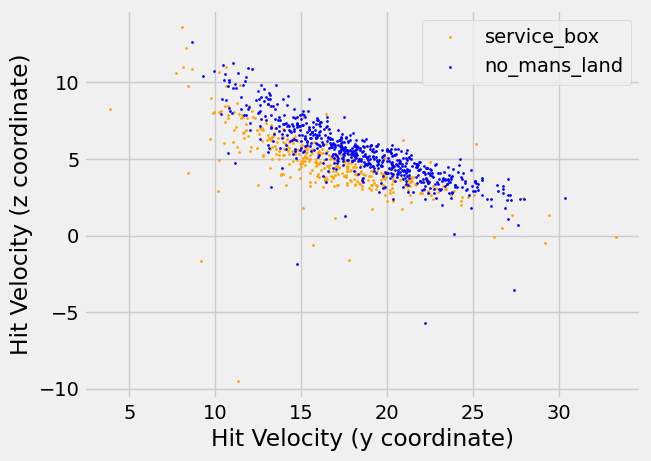

In [46]:
#Run this cell
colors = {'service_box': 'orange', 'no_mans_land': 'blue'}
color_list = [colors[group] for group in coords['bounce_location_long']]
plt.scatter(data = coords.where('bounce_location_long', 'service_box'), x = "hit_velocity_y", y = "hit_velocity_z", s = 2, color = 'orange', label='service_box')
plt.scatter(data = coords.where('bounce_location_long', 'no_mans_land'), x = "hit_velocity_y", y = "hit_velocity_z", s = 2, color = 'blue', label='no_mans_land')
plt.xlabel("Hit Velocity (y coordinate)")
plt.ylabel("Hit Velocity (z coordinate)")
plt.legend();

We can see a fairly clear decision boundary between shots that land in "no_mans_land", colored in blue, and shots that land in the "service_box", colored in orange.

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 4. k-Nearest Regression with SwingVision Dataset

For a refresher on kNN, review [Chapter 17](https://inferentialthinking.com/chapters/17/Classification.html) from the textbook!

**kNN regression is a method used to predict a numerical value based on nearby data points**

To make a prediction:
1. First calculate the Euclidean distance between the point we are trying to predict and each point in the data set.
2. Then find the k closest points, known as the nearest neighbors.
    - Instead of taking a majority vote like we did in kNN classificaiton, we take the average of the values we are trying to predict from the nearest neighbors. This average value becomes our prediction.
3. We can classify (with some degree of accuracy) whether a shot we hit will land in the _service_box_ or _no_mans_land_ based on it's initial velocity, but maybe we would want to be more specific about how _deep_ our shot will land on the opponent's side.
    - After all, the deeper the shot lands, the more pressure you put on the opponent!
    - This is where kNN regression is useful — rather than labeling the bounce location, we can use it to predict the depth (numerical position) where the ball is likely to bounce.

<details>
<summary>Notes:</summary>
        
- Say you are trying to predict x given x's y. The intuition is that if two points are near each other in the scatterplot, then the corresponding measurements are pretty similar, so we might expect them to receive the same prediction (more likely than not).
    - E.g. we don’t know Alice’s diagnosis, but we do know the diagnosis of all the patients in the training set, so we find the patient in the training set who is most similar to Alice, and use that patient’s diagnosis to predict Alice’s diagnosis.

</details>


---

__Question 4.1__ Again, let's split our `coords` dataset into a training set and a test set, reserving the first $200$ shots for the test set and putting the rest into the training set. __(6 Points)__

Note: Do __not__ use `tbl.split`.

In [47]:
coords.show(5)
num_shots = coords.num_rows
print(num_shots)

bounce_location_long,hit_velocity_x,hit_velocity_y,hit_velocity_z,bounce_x,bounce_y,bounce_z
service_box,1.40832,12.8075,5.17498,-1.33419,14.9067,0
no_mans_land,-0.810076,18.2128,5.86215,1.75366,22.1289,0
service_box,5.41003,13.2669,6.3098,2.3472,15.1229,0
no_mans_land,1.82599,25.3135,3.37084,-1.07077,20.9914,0
no_mans_land,1.64479,15.1131,5.46639,0.134519,18.5611,0


996


In [48]:
np.random.seed(8) #DO NOT CHANGE

num_shots = coords.num_rows
shuffled_coords = coords.sample(with_replacement=False)

test_coords = shuffled_coords.take(np.arange(200))
training_coords = shuffled_coords.take(np.arange(200, num_shots))

In [49]:
grader.check("q4_1")

q4_1 results: All test cases passed!

---

__Question 4.2__ As always, let's define a function that calculates the distance between two points according to the relevant attributes. Complete the `distance` function that takes in two rows, and calculates the Euclidean distance using `hit_velocity_y` and `hit_velocity_z`. __(3 Points)__

Note: The formula for Euclidean distance is $\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$

<details>
<summary>Notes on Euclidean distance vs RMSE && WIWW</summary>
    
- RMSE is essentially the average Euclidean distance per point (for one-dimensional errors). Its why we have `np.mean` in it 
- The Euclidean Distance measures the straight-line distance between two points in space.

```python
## you need to grab x y and z respective rows, and their item to compute it Euclidean distance for each column 
def distance(row1, row2):
    y_diff = np.array(row1)
    z_diff = np.array(row2)
    return np.sqrt(np.sum((y_diff - z_diff)**2))
```
</details>

In [50]:
def distance(row1, row2):
    y_diff = row1.item('hit_velocity_y') # indexing works but to be safe use column name 
    z_diff = row1.item('hit_velocity_z')
    y2_diff = row2.item('hit_velocity_y')
    z2_diff = row2.item('hit_velocity_z')
    return np.sqrt((y_diff - y2_diff)**2 + (z_diff - z2_diff)**2)

In [51]:
grader.check("q4_2")

q4_2 results: All test cases passed!

---

__Question 4.3__ Define a function `predict_nn` that takes in a row, and returns the predicted _y_ coordinate of where the ball landed based on the k nearest neighbors. __(10 Points)__

*Hint*: Make sure to read the introduction of Question 4 carefully before approaching this problem!

In [52]:
def predict_nn(point, k):
    num_training = training_coords.num_rows # training tbl that you want (num_rows) 
    dists = make_array() 
    for i in np.arange(num_training):
        compu = distance(point, training_coords.row(i))
        dists = np.append(dists, compu)
    train_dists = training_coords.with_columns('Distance', dists).sort('Distance', descending=False).column('bounce_y')
    return np.mean(train_dists.take(np.arange(k)))
    # return np.mean(train_dists.column('Distance').take(0) * train_dists.column('bounce_y').take(0)) 

In [53]:
grader.check("q4_3")

q4_3 results: All test cases passed!

---
__Question 4.4__ Now, perform kNN regression with $k = 7$ on the test set defined earlier. Calculate the RMSE of our predictions. __(8 Points)__

In [54]:
# redo rmse code for problem 

def rmse_new(predictions, actual_values):
    """Function to calculate RMSE given predicted and actual values."""
    error = make_array() 
    for i in np.arange(len(actual_values)):
        error = np.append(error, np.square(predictions[i] - actual_values[i]))
    return np.sqrt(np.mean(error))

In [55]:
nn_predictions = make_array() 
num_test = test_coords.num_rows

for i in np.arange(num_test):
    preds = predict_nn(test_coords.row(i), 7)
    nn_predictions = np.append(nn_predictions, preds)
    actual_y_vals = test_coords.column('bounce_y')

knn_regression_rmse = rmse_new(nn_predictions, actual_y_vals)
knn_regression_rmse




1.6714115910389151

In [56]:
grader.check("q4_4")

q4_4 results: All test cases passed!

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 5. **(OPTIONAL)** kNN Classification with SwingVision Dataset

Now, we will develop a k-Nearest Neighbors (kNN) classifier to classify how deep a shot lands by predicting whether it bounces in the "service_box" or in "no_mans_land", using the ball's inital velocity in the forward/backward (`hit_velocity_y`) and up/down directions (`hit_velocity_z`).

---

__Question 5.1__ Define the function `classify` that takes in a point (a row object) and `k`, and classifies that point using the data in the training set.

*Hint*: Take a look at [Section 17.4.5](https://inferentialthinking.com/chapters/17/4/Implementing_the_Classifier.html#implementation-step-1) on how to implement this function.

Note: You don't need to follow the skeleton code to answer this question!

In [57]:
training_coords.show(5)

def distance(row1, row2):
    y_diff = row1.item('hit_velocity_y') # indexing works but to be safe use column name 
    z_diff = row1.item('hit_velocity_z')
    y2_diff = row2.item('hit_velocity_y')
    z2_diff = row2.item('hit_velocity_z')
    return np.sqrt((y_diff - y2_diff)**2 + (z_diff - z2_diff)**2)
    

bounce_location_long,hit_velocity_x,hit_velocity_y,hit_velocity_z,bounce_x,bounce_y,bounce_z
no_mans_land,-3.40236,19.9837,5.61746,-0.788821,23.105,0
service_box,4.58208,16.0012,5.24553,2.25722,18.102,0
no_mans_land,-3.99735,23.066,4.07888,-2.93728,23.5398,0
no_mans_land,1.58964,23.9826,3.31317,1.42308,21.1854,0
no_mans_land,-1.2964,16.4902,6.18872,0.552014,21.2223,0


<details>

- The function `predict_nn` is for predicting a continuous bounce_y value — but you're doing classification now, based on categories like "service_box" or "no_mans_land"

```python

# skeleton
# def classify(point, k):
#     num_training = ...
#     dists = ...
#     for ...:
#         ...
#     train_dists = ...
#     return ...

# attempt 1
def classify(point, k):
    num_training = training_coords.num_rows
    dists = make_array()
    for i in np.arange(num_training): 
        preds = predict_nn(training_coords.row(i), preds)
        dists = np.append(dists, preds)
    train_dists = training_coords.with_columns('Distance', dists).sort('Distance', descending=False).column('bounce_location_long')
    return np.mean(train_dists.take(np.arange(k)))
```
</details>

In [63]:
dict_major = {'no_mans_land': 0, 'service_box': 1}
reverse_dict_major = {0: 'no_mans_land', 1: 'service_box'} # key looks up only work based on value, not value to key; there are user def funcs that work tho

def classify(point, k):
    num_training = training_coords.num_rows
    dists = make_array()
    for i in np.arange(num_training): 
        # compute distance between point and every row in training_coords
        row = training_coords.row(i)
        dist = distance(point, row)
        dists = np.append(dists, dist)
    train_dists = training_coords.with_columns('Classified Distances', dists).sort('Classified Distances', descending=False).take(np.arange(k)).column('bounce_location_long')
    binary_vote = np.array([dict_major[label] for label in train_dists]) # no trabajo porque train_dists es una mesa # train_dists.apply(dict_major)
    num_one = np.count_nonzero(binary_vote)
    num_zero = k - num_one  # count num of 0s
    
    # if logic
    if num_one > num_zero: 
        return reverse_dict_major[1]
    else: 
        return reverse_dict_major[0]


# works but the problem wants a string as answer
# and we cant `apply` the dictionary  because train_dists is now a column (i.e. array). So use np.array to with list comprenhension to convert


In [64]:
grader.check("q5_1")

q5_1 results: All test cases passed!

Let's test our classifier on the first data point in our test set with $k = 7$!

In [65]:
classify(test_coords.row(0), 7)

'no_mans_land'

In [66]:
test_coords.show(1)

bounce_location_long,hit_velocity_x,hit_velocity_y,hit_velocity_z,bounce_x,bounce_y,bounce_z
no_mans_land,3.79479,16.46,7.08293,0.554779,19.0179,1.72116


---

__Question 5.2__ Define a function `accuracy` which takes in an array of predictions (an array of actual values) and returns the proportion of correct predictions.

In [69]:
def accuracy(preds, y):
    """Func calculates accuracy which is defined as

        num of correct predict / total num of predic
    """
    correct_array = np.count_nonzero(preds == y) # correct array returns number of correct => no need for len 
    accuracy = correct_array / len(y) # use len instead of num_rows because we are working with arr v.s. table
    return accuracy

In [70]:
grader.check("q5_2")

q5_2 results: All test cases passed!

---

__Question 5.3__ Now, determine the accuracy of the kNN classifier we developed on the test set we defined earlier, using $k = 7$.

**Hint**: Consider using a for loop to store the prediction of each shot from `test_coords` in the array `predictions`.

<details><summary>Code</summary>

```python
nn_predictions = make_array() 
num_test = test_coords.num_rows

for i in np.arange(num_test):
    preds = predict_nn(test_coords.row(i), 7)
    nn_predictions = np.append(nn_predictions, preds)
    actual_y_vals = test_coords.column('bounce_y')

knn_regression_rmse = rmse_new(nn_predictions, actual_y_vals)
knn_regression_rmse
```
</details>

In [74]:
# my work
num_test = test_coords.num_rows 
predictions = make_array() 

for i in np.arange(num_test): 
    classifier = classify(test_coords.row(i), 7) # you are testing classification not regression
    predictions = np.append(predictions, classifier) 
accuracy(predictions, test_coords.column("bounce_location_long"))

0.8

**An accuracy of 0.8 means your kNN classifier correctly predicted the shot depth 80% of the time on the test set.**

### Improving classification next steps: 
1. Looking at a `confusion matrix` to see which class is being misclassified more often.
2. Trying other values of k (e.g. 3, 5, 9...) to see if accuracy improves.
3. Comparing with a baseline classifier that always picks the majority class.

In [75]:
grader.check("q5_3")

q5_3 results: All test cases passed!

You're done with Homework 12!

## Pets of Data 8

Boba thinks you should treat yourself to a boba!

<img src="boba.jpeg" width="40%" alt="Shorthair cat smirking at camera"/>

Congrats on finishing the final homework!

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Written Work Submission

Below, you will see two cells. Running the first cell will automatically generate a PDF of all questions that need to be manually graded, and running the second cell will automatically generate a zip with your autograded answers. You are responsible for submitting both the coding portion (the zip) and the written portion (the PDF) to their respective Gradescope portals. **Please save before exporting!**

> **Important: You must correctly assign the pages of your PDF after you submit to the correct gradescope assignment. If your pages are not correctly assigned and/or not in the correct PDF format by the deadline, we reserve the right to award no points for your written work.**

If there are issues with automatically generating the PDF in the first cell, you can try downloading the notebook as a PDF by clicking on `File -> Save and Export Notebook As... -> Webpdf`. If that doesn't work either, you can manually take screenshots of your answers to the manually graded questions and submit one single PDF of your screenshots. Either way, **you are responsible for ensuring your submission follows our requirements, we will NOT be granting regrade requests for submissions that don't follow instructions.**

**You must submit the PDF generated via one of these methods, we will not accept screenshots or Word documents.**

In [ ]:
from otter.export import export_notebook
from os import path
from IPython.display import display, HTML
name = 'hw12'
export_notebook(f"{name}.ipynb", filtering=True, pagebreaks=True)
if(path.exists(f'{name}.pdf')):
    display(HTML(f"Download your PDF <a href='{name}.pdf' download>here</a>."))
else:
    print("\n Pdf generation failed, please try the other methods described above")

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [76]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q1_6 results: All test cases passed!

q1_7 results: All test cases passed!

q1_8 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q2_4 results: All test cases passed!

q2_5 results: All test cases passed!

q2_6 results: All test cases passed!

q3_1 results: All test cases passed!

q3_2 results: All test cases passed!

q4_1 results: All test cases passed!

q4_2 results: All test cases passed!

q4_3 results: All test cases passed!

q4_4 results: All test cases passed!

q5_1 results: All test cases passed!

q5_2 results: All test cases passed!

q5_3 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)